----------------

# Отчет по лабораторной работе: "Деревья принятий решений"

---------

## Дата выполнения лабораторной работы

`04.01.2025`

---

## Название лабораторной работы 

`"Деревья принятий решений"`

---

## Цель лабораторной работы

`Разработать и оценить модели машинного обучения для предсказания коэффициента биоконцентрации logBCF с использованием методов градиентного бустинга и случайного леса`

----------------------

## Задачи лабораторной работы

1. Построить модели на основе градиентного бустинга и случайного леса.
2. Подобрать оптимальные гиперпараметры моделей с использованием GridSearchCV.
3. Оценить качество моделей с помощью коэффициента детерминации  𝑄2 и среднеквадратичной ошибки (RMSE).
4. Сохранить лучшие модели с помощью pickle.dump для их дальнейшего использования.
5. Сравнить полученные модели и сделать вывод о наиболее эффективном методе предсказания logBCF.

----

## Материалы, использовавшиеся для выполнения лабораторной работы (программы, исходные файлы ?) 

1. [Официальная документация scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

2. [Официальная документация XGBoost](https://xgboost.readthedocs.io/en/stable/parameter.html)

----

## Поэтапное изложение процедуры


В данной лабораторной работе рассматривается задача предсказания коэффициента биоконцентрации logBCF с использованием методов машинного обучения. Для построения предсказательных моделей используются градиентный бустинг и случайный лес.

1. Подбор гиперпараметров
* Для улучшения качества моделей проводится оптимизация гиперпараметров с помощью метода GridSearchCV. Подбираются следующие параметры:

    max_features – количество признаков, используемых при построении каждого дерева,
    n_estimators – число деревьев в ансамбле,
    learning_rate – темп обучения (для градиентного бустинга).
    Обучение моделей

2. С использованием найденных оптимальных параметров обучаются две модели:

    регрессор на основе градиентного бустинга,
    регрессор на основе случайного леса.

3. Оценка качества моделей

Качество построенных моделей оценивается с помощью следующих метрик:

    коэффициент детерминации 𝑄2,
    среднеквадратичная ошибка (RMSE).

4. Сохранение моделей
На финальном этапе лучшие модели сохраняются с помощью pickle.dump, что позволяет использовать их в дальнейшем без необходимости повторного обучения.

5. Сравнение моделей

На основе полученных значений метрик проводится сравнение моделей, позволяющее определить, какой метод (градиентный бустинг или случайный лес) показывает лучшие результаты при предсказании коэффициента logBCF.

-----

## Результаты работы (+ таблицы, графики, иллюстрации?, если требуются)


1. Сравнение градиентного бустинга (XGBRegressor) и случайного леса (RandomForestRegressor)

* В целом модели случайного леса показывают немного лучшие значения 𝑄2 (0.74 против 0.71 у лучших моделей XGB).
* RMSE также ниже у случайного леса (лучшие модели ≈ 0.65–0.68), что указывает на меньшую ошибку предсказаний по сравнению с градиентным бустингом (0.74–0.77).
* Однако XGB быстрее обучается (например, mean_time_fit_s_cv ≈ 0.1 с для лучших моделей против 0.27 с у случайного леса).
* Размер моделей в случайном лесе выше (до 3.66 МБ), что может повлиять на их применение в ресурсозависимых задачах.

2. Влияние нормализации и выбора признаков

* PCA (снижение размерности) ухудшает качество предсказаний:
    * Для XGB  𝑄2 падает до 0.10–0.24, RMSE растёт до 1.22.
    * Для случайного леса аналогично:  𝑄2~0.13–0.20, RMSE ≈ 1.1.

* Использование всех дескрипторов (AllStdSc, AllMinMaxSc) даёт лучшие результаты, но требует больше памяти и времени обучения.
* Разные методы нормализации (StdSc и MinMaxSc) дают схожие результаты.

3. Выбор лучшей модели

* Оптимальный случайный лес: ForestRegrAllStdSc 𝑄2=0.73, RMSE = 0.65 (наименьшая ошибка), Время обучения 1.83 с (самое большое среди моделей)
* Оптимальный XGB: XGBRegrAllStdSc 𝑄2=0.68, RMSE = 0.74, Время обучения всего 1.27 с


Если важна точность — лучше использовать ForestRegrAllStdSc.
Если важна быстрота обучения — лучше использовать XGBRegrAllStdSc.


In [1]:
import pandas as pd

pd.read_csv("./xgbregr/xgbregr.csv")

,model,size_x_test,r2_train,q2_test,rmse,mean_time_fit_s_cv,mean_ram_fit_mb,size_model_pipeline_mb,grade,params
0,XGBRegrMinMaxSc,25%,0.99,0.71,0.77,0.09,0.06,0.21,False,"{'learning_rate': np.float64(0.16), 'max_depth..."
1,XGBRegrStdSc,25%,0.99,0.71,0.77,0.10,0.05,0.21,False,"{'learning_rate': np.float64(0.16), 'max_depth..."
2,XGBRegrLassoStdSc,25%,1.00,0.67,0.74,0.36,0.12,0.42,False,{'learning_rate': np.float64(0.099999999999999...
3,XGBRegrLassoMinMaxSc,25%,1.00,0.66,0.75,0.35,0.00,0.53,False,"{'learning_rate': np.float64(0.13), 'max_depth..."
4,XGBRegrPCAStdSc,25%,0.66,0.10,1.22,0.07,0.00,0.11,False,{'learning_rate': np.float64(0.099999999999999...
5,XGBRegrPCAMinMaxSc,25%,0.52,0.24,1.13,0.10,0.00,0.27,False,"{'learning_rate': np.float64(0.04), 'max_depth..."
6,XGBRegrAllStdSc,25%,1.00,0.68,0.74,1.27,0.03,1.82,False,{'learning_rate': np.float64(0.069999999999999...
7,XGBRegrAllMinMaxSc,25%,1.00,0.68,0.74,1.18,0.02,1.82,False,{'learning_rate': np.float64(0.069999999999999...


In [2]:
pd.read_csv("./forestregr/forestregr.csv")

,model,size_x_test,r2_train,q2_test,rmse,mean_time_fit_s_cv,mean_ram_fit_mb,size_model_pipeline_mb,grade,params
0,ForestRegrMinMaxSc,25%,0.97,0.74,0.67,0.27,0.02,1.97,True,"{'bootstrap': True, 'max_depth': np.int64(25),..."
1,ForestRegrStdSc,25%,0.96,0.74,0.68,0.18,0.00,1.23,True,"{'bootstrap': True, 'max_depth': np.int64(50),..."
2,ForestRegrLassoStdSc,25%,0.97,0.71,0.67,0.80,0.01,2.44,True,"{'bootstrap': True, 'max_depth': np.int64(35),..."
3,ForestRegrLassoMinMaxSc,25%,0.97,0.71,0.67,0.67,0.00,2.11,True,"{'bootstrap': True, 'max_depth': np.int64(15),..."
4,ForestRegrPCAStdSc,25%,0.80,0.13,1.16,0.19,0.00,0.80,False,"{'bootstrap': True, 'max_depth': np.int64(10),..."
5,ForestRegrPCAMinMaxSc,25%,0.57,0.20,1.11,0.13,0.00,0.66,False,"{'bootstrap': True, 'max_depth': np.int64(10),..."
6,ForestRegrAllStdSc,25%,0.97,0.73,0.65,1.83,0.01,3.66,True,"{'bootstrap': True, 'max_depth': np.int64(25),..."
7,ForestRegrAllMinMaxSc,25%,0.97,0.71,0.67,1.68,0.00,3.41,True,"{'bootstrap': True, 'max_depth': np.int64(35),..."


---

### Важность признаков с помощью деревьев


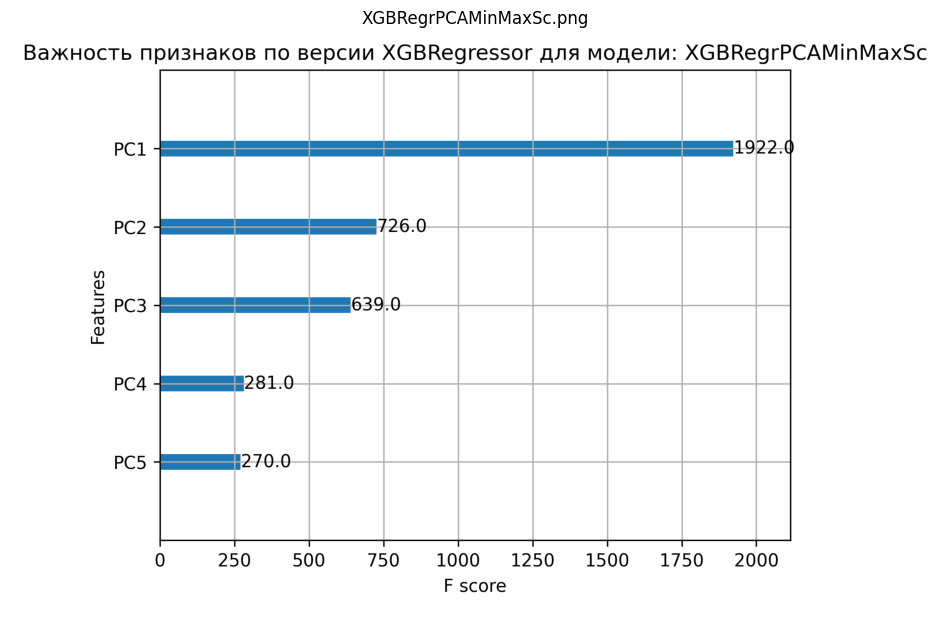

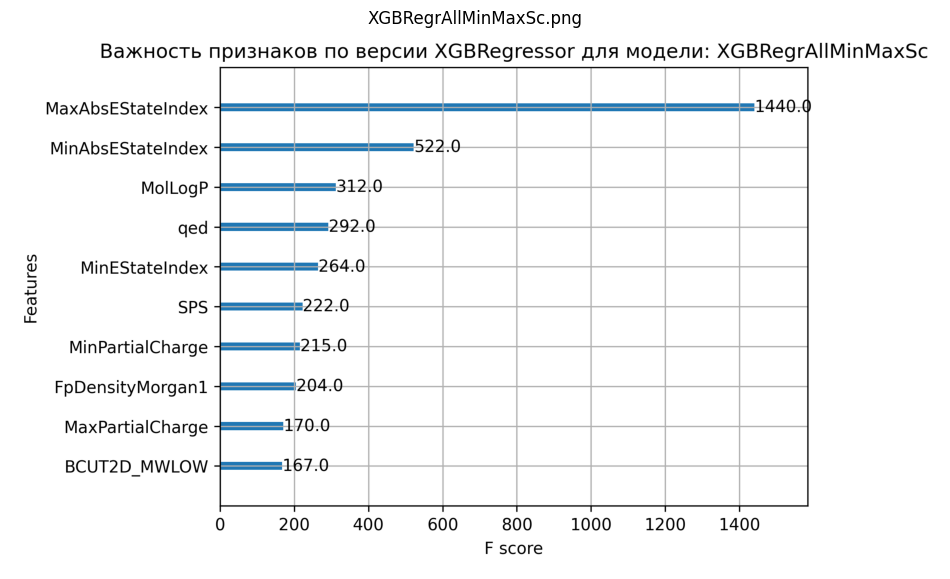

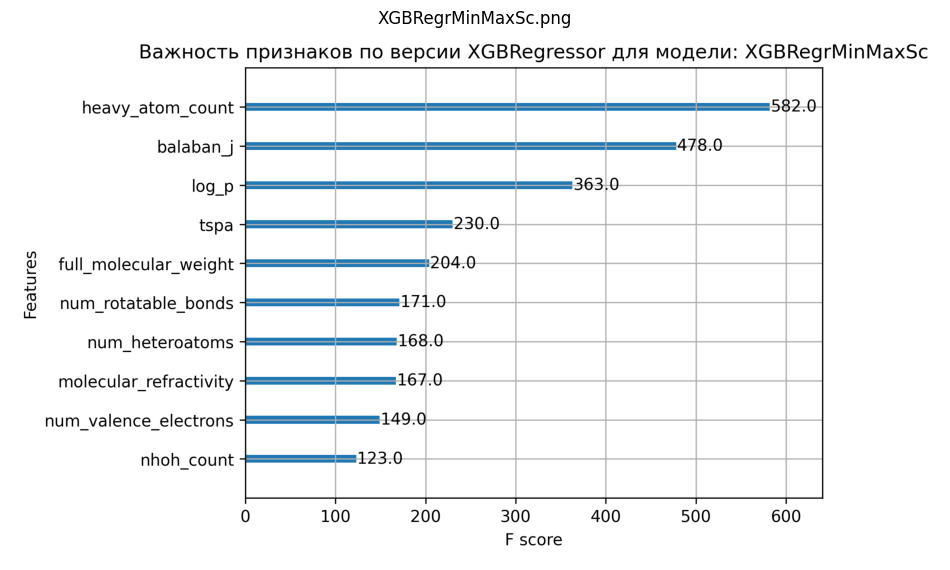

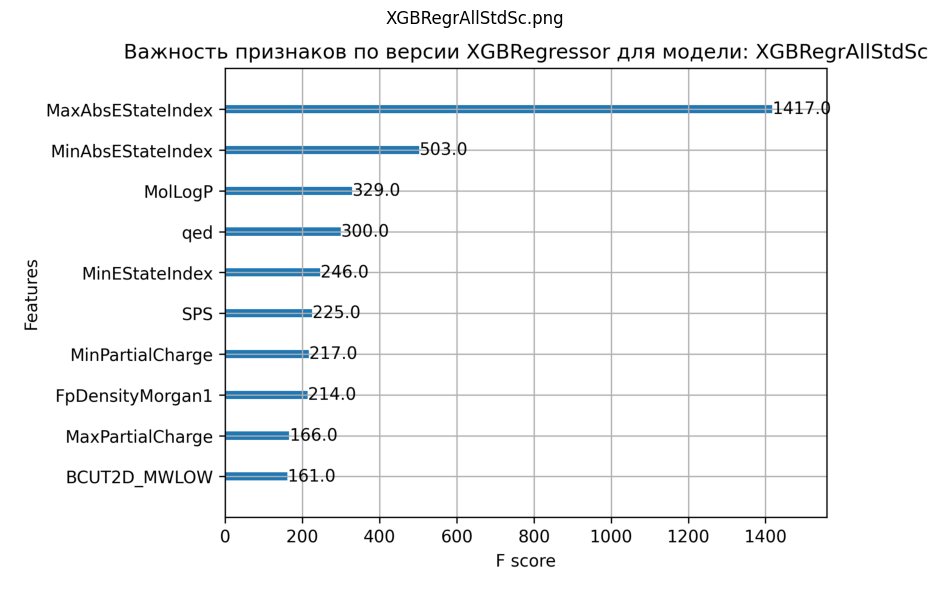

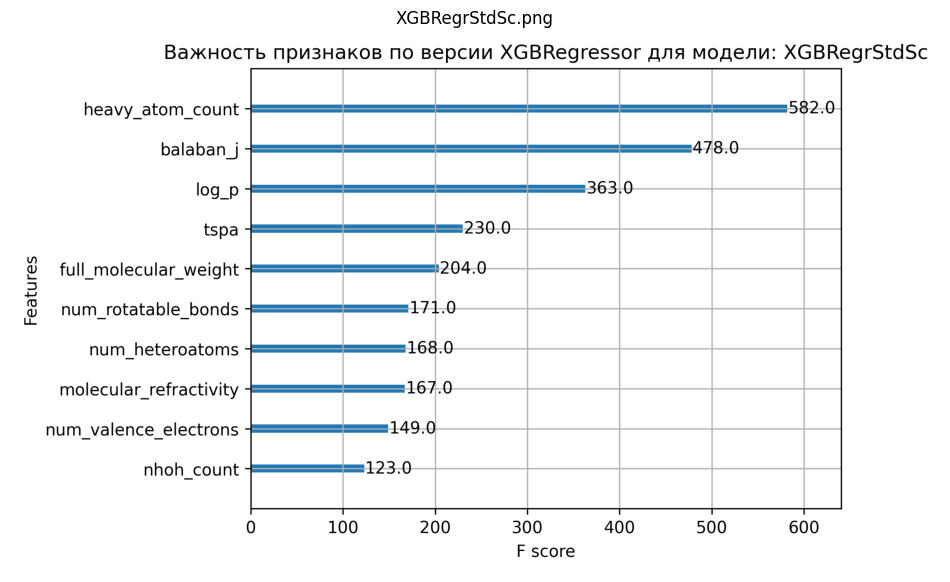

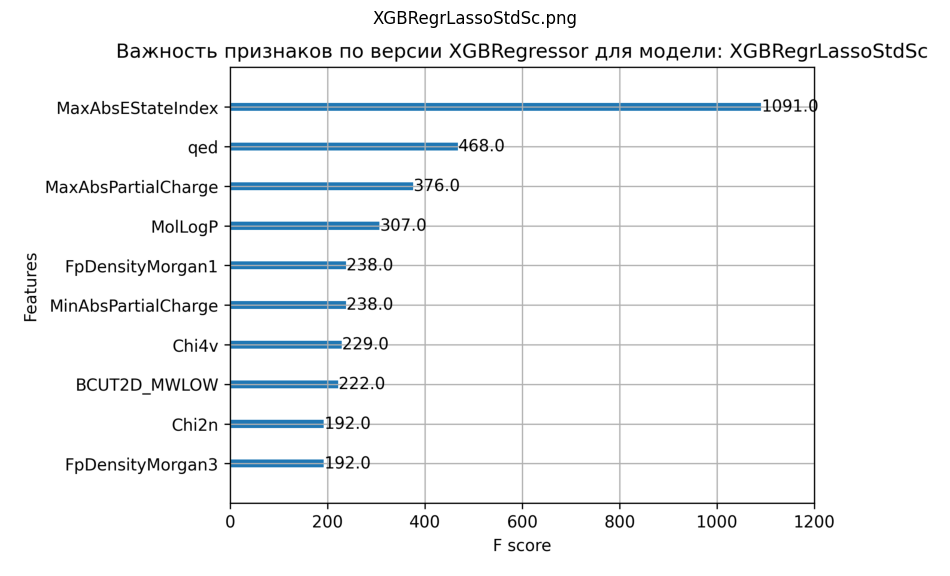

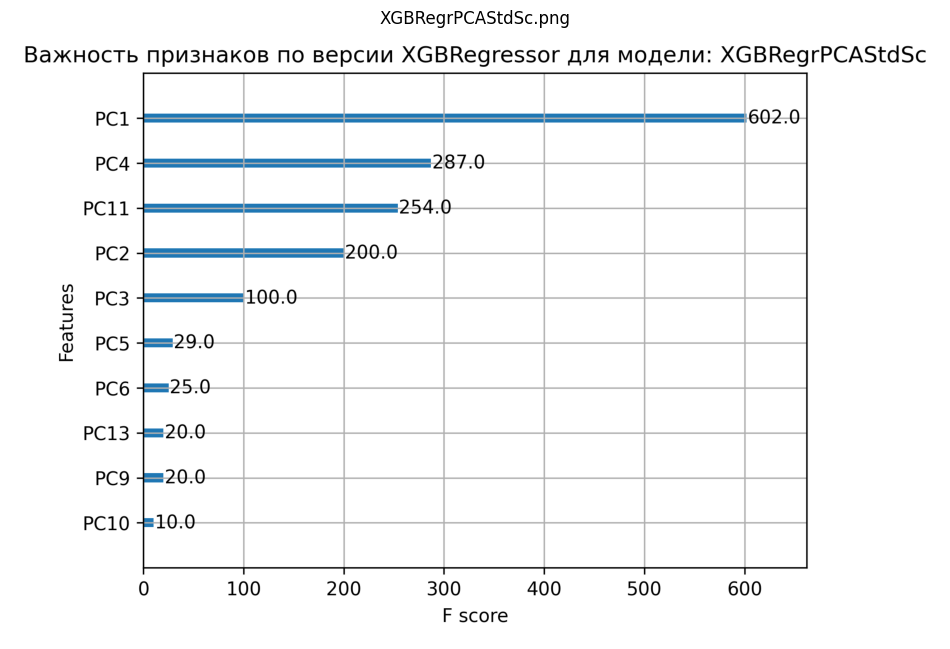

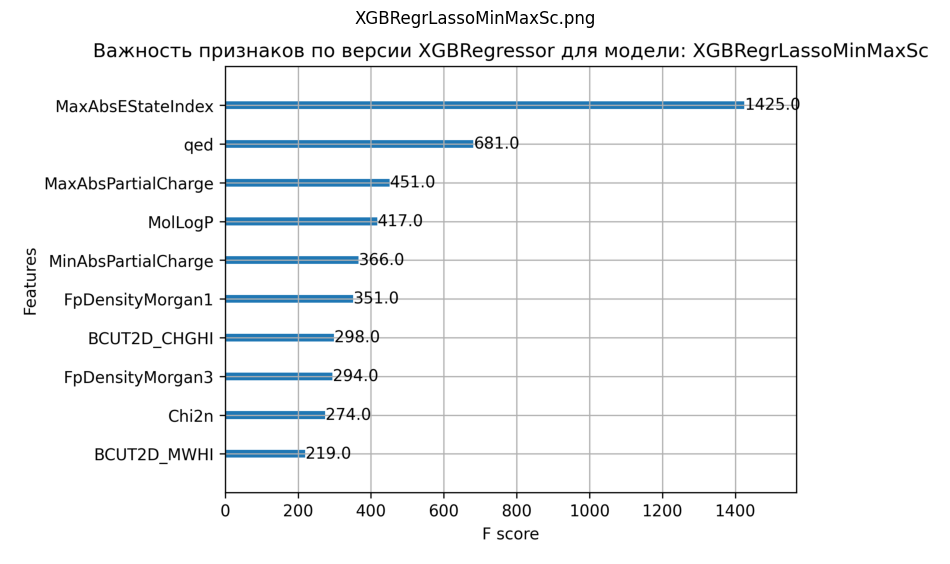

In [3]:
import os
import matplotlib.pyplot as plt
from PIL import Image

folder_path = "./xgbregr/importances"

image_files = [f for f in os.listdir(folder_path) if f.endswith(".png")]

for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    img = Image.open(image_path)
    
    plt.figure(figsize=(12, 10))
    plt.imshow(img)
    plt.axis("off")
    plt.title(image_file)
    plt.show()

--------

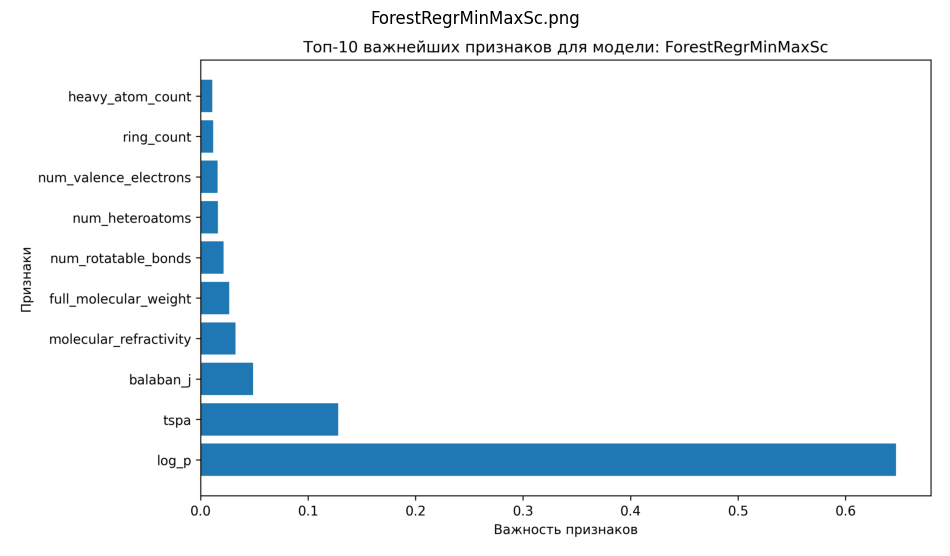

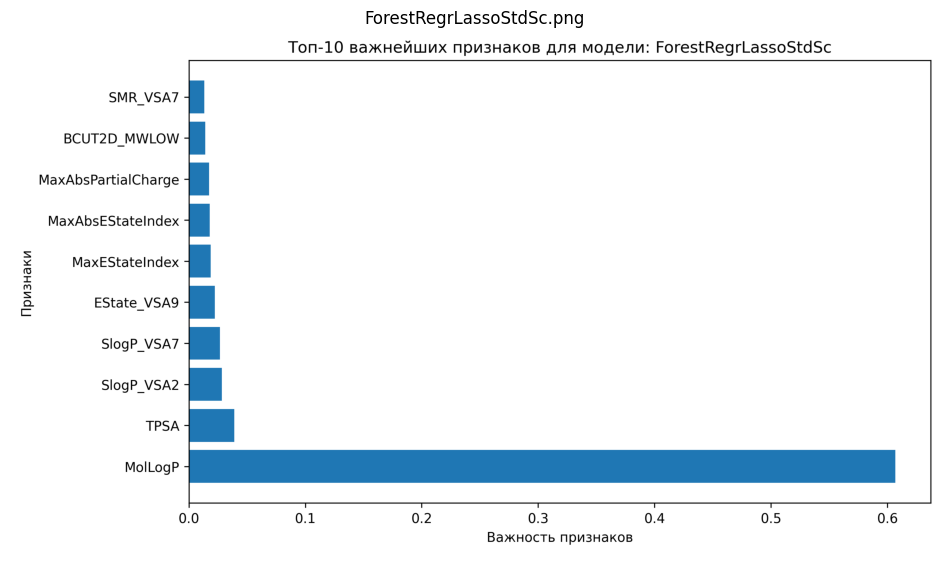

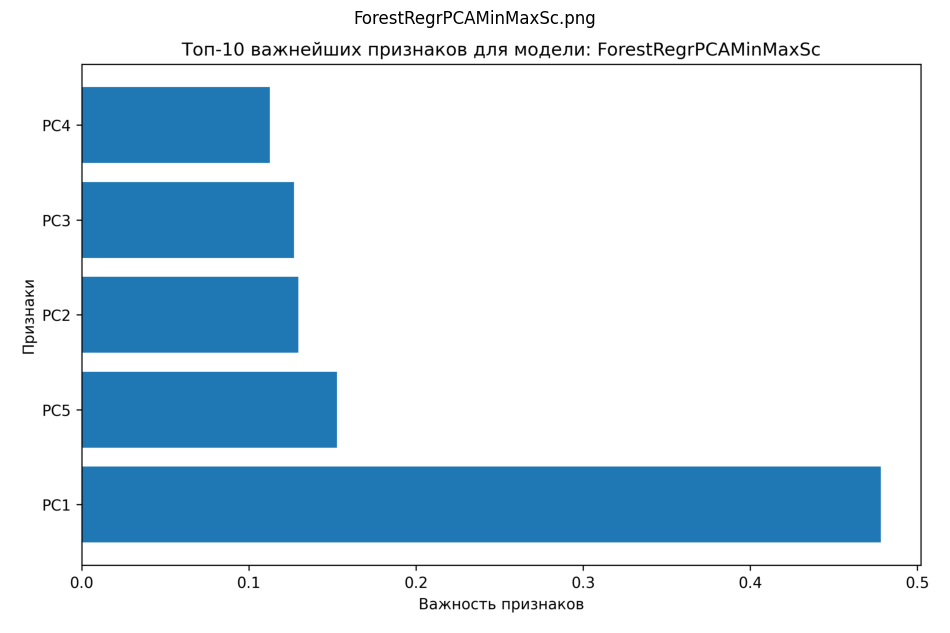

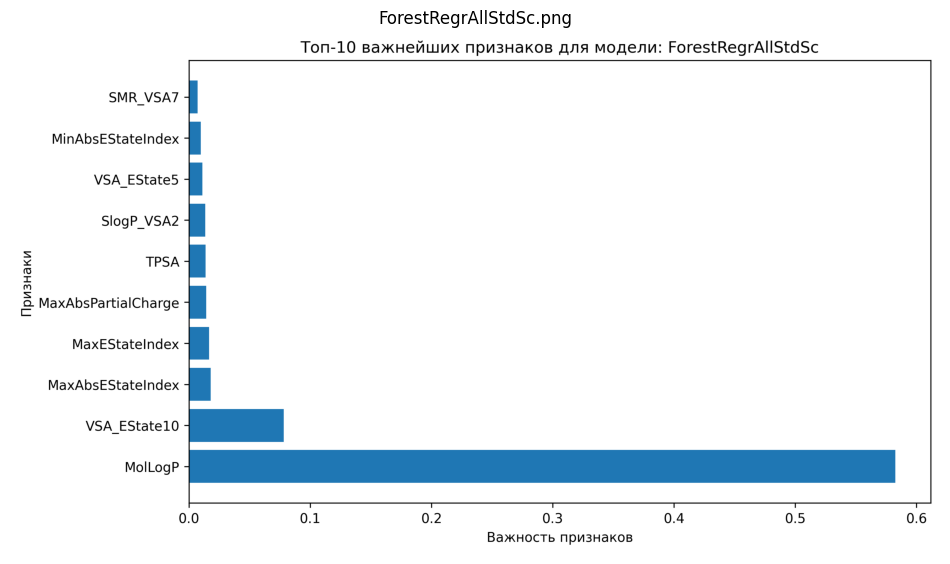

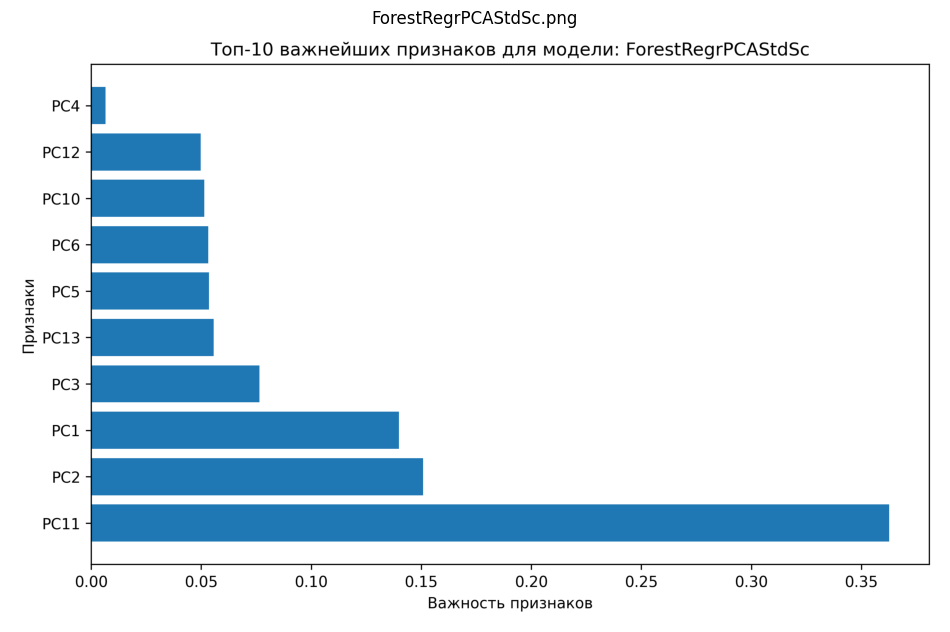

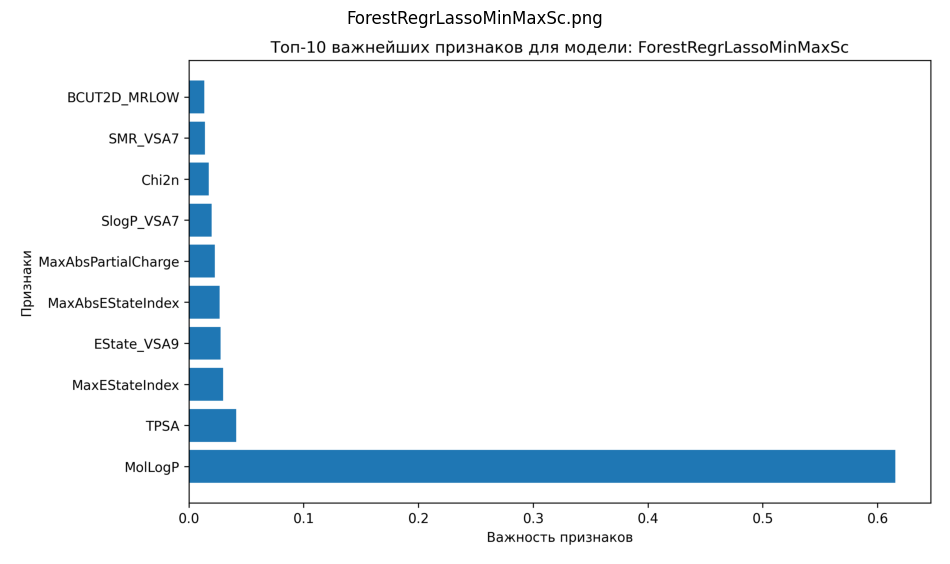

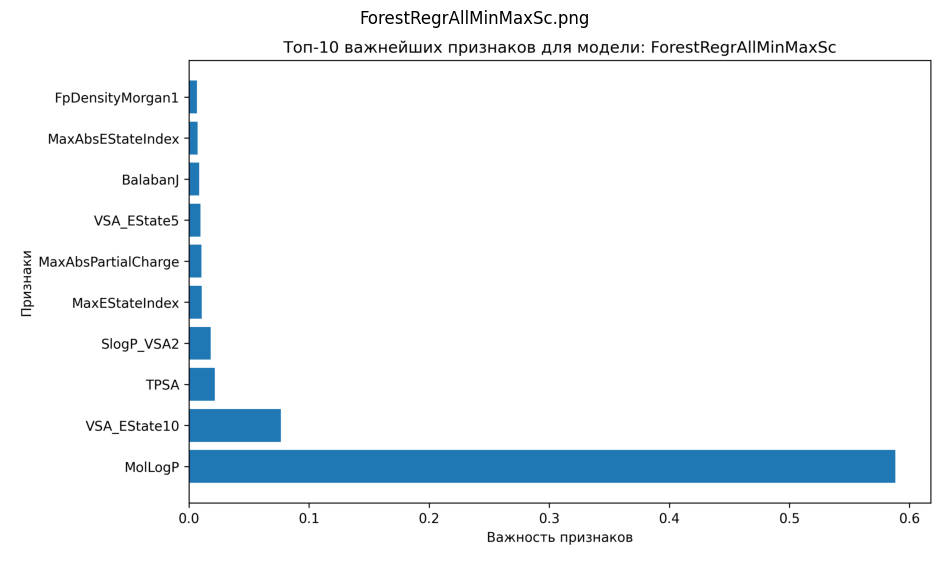

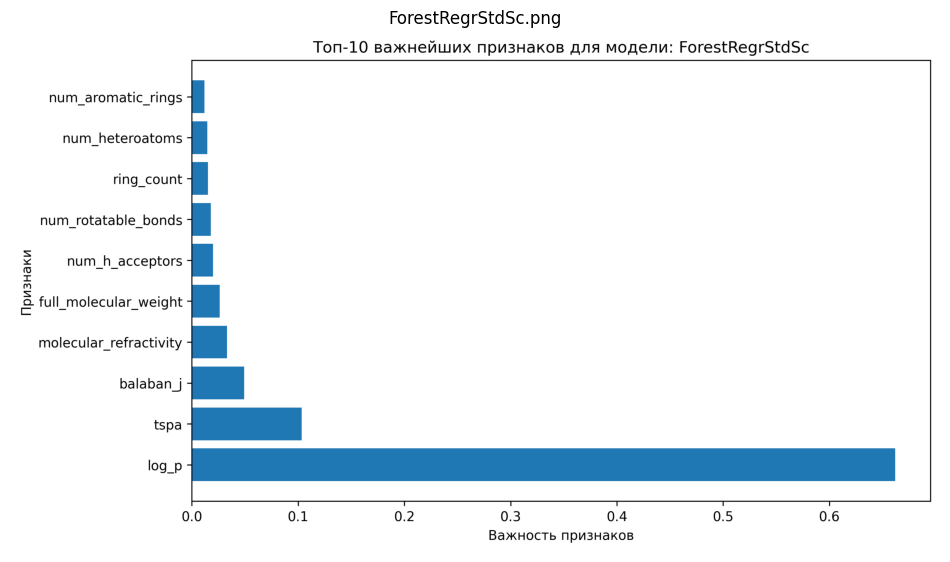

In [4]:
import os
import matplotlib.pyplot as plt
from PIL import Image

folder_path = "./forestregr/importances"

image_files = [f for f in os.listdir(folder_path) if f.endswith(".png")]

for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    img = Image.open(image_path)
    
    plt.figure(figsize=(12, 10))
    plt.imshow(img)
    plt.axis("off")
    plt.title(image_file)
    plt.show()

----

## Выводы 


Случайный лес показывает немного лучшие результаты по качеству предсказаний, но градиентный бустинг быстрее обучается и потребляет меньше памяти.